In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)

## Polynominal Regression

In [2]:
from sklearn.preprocessing import PolynomialFeatures

x, y, z == x^2, y^2, z^2, xy, xz, yz, B

In [3]:
data = np.array([2, 3, 4]).reshape(1, -1)
print(data)

[[2 3 4]]


In [4]:
trans = PolynomialFeatures(degree=2, include_bias=False)

In [5]:
data = trans.fit_transform(data)
print(data)

[[ 2.  3.  4.  4.  6.  8.  9. 12. 16.]]


In [6]:
 df = pd.read_csv('Advertising.csv')

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X = df.drop('sales', axis=1)
y = df.sales

In [9]:
polynominal_conventer = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
polynominal_conventer.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynominal_conventer.transform(X) 

In [12]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
poly_features.shape

(200, 9)

In [14]:
 pd.DataFrame(poly_features, columns=['TV', 'radio', 'newspaper', 'TV^2', 'TV&Radio','TV&Newspaper', 'Radio^2', 'Radio&Newspaper', 'Newspaper^2']).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&Newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [15]:
X.shape

(200, 3)

In [16]:
pd.DataFrame(poly_features[0], index=['TV', 'radio', 'newspaper', 'TV^2', 'TV&Radio','TV&Newspaper', 'Radio^2', 'Radio&Newspaper', 'Newspaper^2'], columns=['New_features']).head(9)

,New_features
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&Newspaper,2615.76
Newspaper^2,4788.64


## Train | Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Model for fitting on Polynominal Data

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_poly = LinearRegression(fit_intercept=True)

In [21]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model_poly.predict(X_test)

In [23]:
my_dict = {'Actual' : y_test, 'Pred' : y_pred}

In [24]:
compare = pd.DataFrame(my_dict)
compare

,Actual,Pred
37,14.7,13.948562
109,19.8,19.334803
31,11.9,12.319282
89,16.7,16.762863
66,9.5,7.902109
119,6.6,6.941438
54,20.2,20.133727
74,17.0,17.500927
145,10.3,10.568890
142,20.1,20.125518


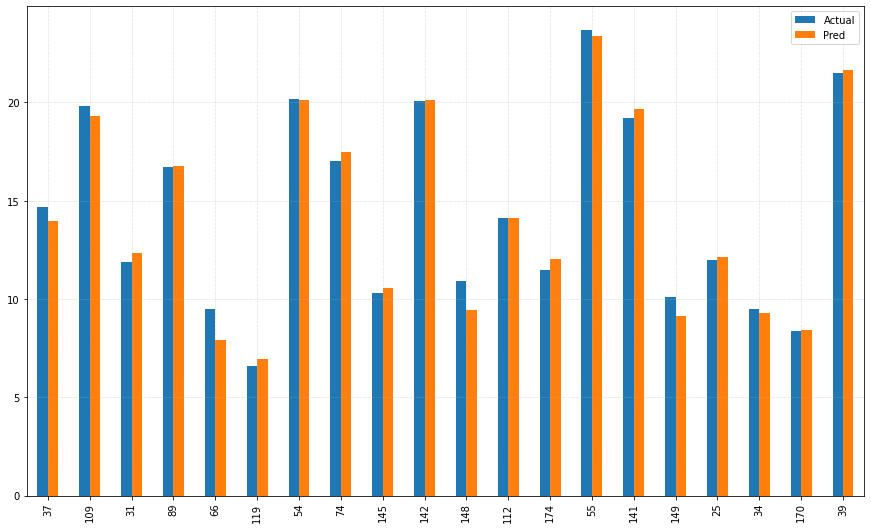

In [25]:
compare.head(20).plot(kind='bar', figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5')
plt.show();

In [26]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [27]:
df_coef = pd.DataFrame(model_poly.coef_, index = ['TV', 'radio', 'newspaper', 'TV^2', 'TV&Radio','TV&Newspaper', 'Radio^2', 'Radio&Newspaper', 'Newspaper^2'], columns=['coef'])

In [28]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&Newspaper,0.000146
Newspaper^2,-0.000030


In [29]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [30]:
df_features= pd.DataFrame(poly_features[0], index =  ['TV', 'radio', 'newspaper', 'TV^2', 'TV&Radio','TV&Newspaper', 'Radio^2', 'Radio&Newspaper', 'Newspaper^2'], columns=['features_value'] )

In [31]:
df_features

,features_value
TV,230.10
radio,37.80
newspaper,69.20
TV^2,52946.01
TV&Radio,8697.78
TV&Newspaper,15922.92
Radio^2,1428.84
Radio&Newspaper,2615.76
Newspaper^2,4788.64


In [32]:
df_features.join(df_coef)

,features_value,coef
TV,230.10,0.051710
radio,37.80,0.013085
newspaper,69.20,0.012000
TV^2,52946.01,-0.000111
TV&Radio,8697.78,0.001142
TV&Newspaper,15922.92,-0.000052
Radio^2,1428.84,0.000033
Radio&Newspaper,2615.76,0.000146
Newspaper^2,4788.64,-0.000030


In [33]:
y_0 = df_coef.coef * df_features.features_value  # it will show which feature is good to use and more benefit than others 
y_0

TV                 11.898375
radio               0.494609
newspaper           0.830401
TV^2               -5.871314
TV&Radio            9.933967
TV&Newspaper       -0.834520
Radio^2             0.047855
Radio&Newspaper     0.382896
Newspaper^2        -0.145917
dtype: float64

In [34]:
X_train[0]

array([1.932000e+02, 1.840000e+01, 6.570000e+01, 3.732624e+04,
       3.554880e+03, 1.269324e+04, 3.385600e+02, 1.208880e+03,
       4.316490e+03])

In [35]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

In [36]:
y_0.sum() + model_poly.intercept_

21.861906993140323

Feature Selection

In [37]:
11.898375 -5.871314 + 9.933967 + model_poly.intercept_

21.08658542313269

TV and radio has alomost 99% all benefits

## Let's compare results of linear and poly regression

In [38]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
model_linear = LinearRegression(fit_intercept=True)

In [40]:
model_linear.fit(X_train2, y_train2)

LinearRegression()

In [41]:
model_linear.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [42]:
coef = pd.DataFrame(model_linear.coef_, index=X.columns, columns=['coef'])
coef

,coef
TV,0.044696
radio,0.187566
newspaper,-0.000323


In [43]:
feature = pd.DataFrame(X.loc[0].values, index=X.columns, columns=['features'])
feature

,features
TV,230.1
radio,37.8
newspaper,69.2


In [44]:
y_1 = coef.coef * feature.features
y_1

TV           10.284548
radio         7.089984
newspaper    -0.022335
dtype: float64

In [45]:
coef.join(feature)

,coef,features
TV,0.044696,230.1
radio,0.187566,37.8
newspaper,-0.000323,69.2


In [46]:
pd.concat([y_0, y_1], axis=1).rename(columns= {0: 'poly', 1:'linear'})

,poly,linear
TV,11.898375,10.284548
radio,0.494609,7.089984
newspaper,0.830401,-0.022335
TV^2,-5.871314,NaN
TV&Radio,9.933967,NaN
TV&Newspaper,-0.834520,NaN
Radio^2,0.047855,NaN
Radio&Newspaper,0.382896,NaN
Newspaper^2,-0.145917,NaN


## Evaluation on the Test Set

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score_r2 = r2_score(actual, pred)
    return print('r2_score', score_r2, '\n', 'MAE',mae,'\n','MSE',mse,'\n','RMSE',rmse)

In [49]:
test_predictions = model_poly.predict(X_test)

In [50]:
eval_metric(y_test, test_predictions)

r2_score 0.9843529333146795 
 MAE 0.48967980448035886 
 MSE 0.44175055104033895 
 RMSE 0.6646431757269


In [51]:
test_predictions2 = model_linear.predict(X_test2)

In [52]:
eval_metric(y_test2, test_predictions2)

r2_score 0.9185780903322445 
 MAE 1.213745773614481 
 MSE 2.2987166978863796 
 RMSE 1.5161519375993884


In [53]:
y_train_pred = model_poly.predict(X_train)

In [54]:
eval_metric(y_test, test_predictions)

r2_score 0.9843529333146795 
 MAE 0.48967980448035886 
 MSE 0.44175055104033895 
 RMSE 0.6646431757269


In [55]:
eval_metric(y_train, y_train_pred)

r2_score 0.9868638137712757 
 MAE 0.4049248139151435 
 MSE 0.34569391424440005 
 RMSE 0.5879574085292234


## Let's find optimal degree of poly

In [56]:
def poly(d):

    train_rmse_errors = []
    test_rmse_errors = []

    for i in range(1, d):
        polynominal_conventer = PolynomialFeatures(degree=i, include_bias=False)
        poly_features = polynominal_conventer.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)


    return pd.DataFrame({'train_rmse_errors': train_rmse_errors, 'test_rmse_errors':test_rmse_errors})



In [57]:
poly(10)

,train_rmse_errors,test_rmse_errors
0,1.734594,1.516152
1,0.587957,0.664643
2,0.433934,0.580329
3,0.351708,0.507774
4,0.250934,2.575818
5,0.193771,4.326230
6,5.421674,1379.160510
7,0.140859,4367.664802
8,0.172162,98579.948532


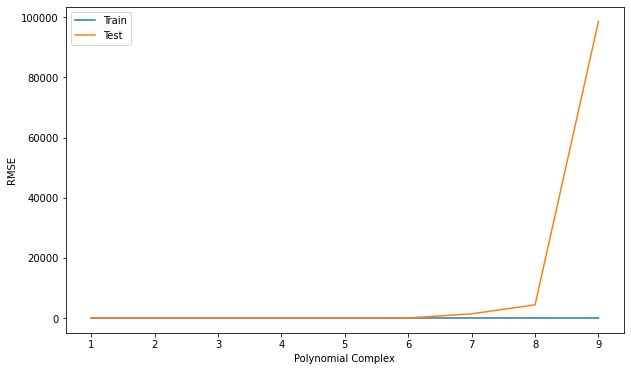

In [58]:
plt.plot(range(1, 10), poly(10)['train_rmse_errors'], label = "Train")
plt.plot(range(1, 10), poly(10)['test_rmse_errors'], label = "Test")
plt.xlabel('Polynomial Complex')
plt.ylabel('RMSE')
plt.legend();

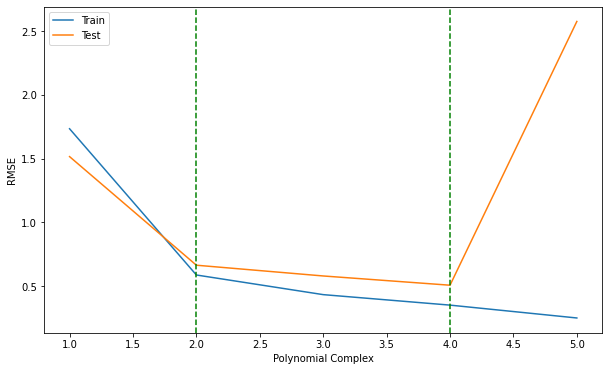

In [59]:
plt.plot(range(1, 6), poly(6)['train_rmse_errors'], label = "Train")
plt.plot(range(1, 6), poly(6)['test_rmse_errors'], label = "Test")
plt.xlabel('Polynomial Complex')
plt.ylabel('RMSE')
plt.axvline(x=2, linestyle='--',color='g')
plt.axvline(x=4, linestyle='--',color='g')
plt.legend();

## Overfitting

In [64]:
over_poly_conventer = PolynomialFeatures(degree=5, include_bias=False)

In [65]:
over_model = LinearRegression()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_conventer.fit_transform(X), y, test_size=0.3, random_state=101)

In [68]:
over_model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred_over = over_model.predict(X_test)

In [70]:
eval_metric(y_test, y_pred_over)

r2_score 0.7649900573390357 
 MAE 0.6659592351151074 
 MSE 6.634839216722723 
 RMSE 2.5758181645300047


In [71]:
y_train_over = over_model.predict(X_train)

In [72]:
eval_metric(y_train, y_train_over)

r2_score 0.9976072485256589 
 MAE 0.1862130552361816 
 MSE 0.06296801891939971 
 RMSE 0.25093429203558393


## Finalizing Model Choice

In [60]:
final_poly_conventer = PolynomialFeatures(degree=3, include_bias=False)

In [61]:
final_model = LinearRegression()

In [62]:
final_model.fit(final_poly_conventer.fit_transform(X),y)

LinearRegression()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_conventer.fit_transform(X), y, test_size=0.3, random_state=101)

In [108]:
y_pred_final = final_model.predict(X_test)

## Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
model_poly = LinearRegression()

In [90]:
model_poly = LinearRegression()
scores = cross_val_score(estimator=model_poly, X = X_train, y = y_train, cv = 10, scoring='r2')
scores

array([0.99320218, 0.99239726, 0.98790505, 0.97646539, 0.99404816,
       0.95559408, 0.9932446 , 0.99608104, 0.96541804, 0.99386084])

In [86]:
scores.mean()

0.9848216638532158

In [91]:
model_poly = LinearRegression()
scores = cross_val_score(estimator=model_poly, X = X_train, y = y_train, cv = 10, scoring='neg_mean_absolute_error')
scores

array([-0.31616729, -0.41252836, -0.37940675, -0.49736123, -0.27099016,
       -0.53266228, -0.24700441, -0.31127691, -0.4803783 , -0.28053726])

In [93]:
-scores

array([0.31616729, 0.41252836, 0.37940675, 0.49736123, 0.27099016,
       0.53266228, 0.24700441, 0.31127691, 0.4803783 , 0.28053726])

In [94]:
-scores.mean()

0.3728312954055729

In [98]:
model_poly = LinearRegression()
scores = cross_val_score(estimator=model_poly, X = X_train, y = y_train, cv = 10, scoring='neg_root_mean_squared_error')
scores

array([-0.40777696, -0.52246339, -0.48015642, -0.77004314, -0.3355874 ,
       -1.18311765, -0.37079169, -0.36310277, -0.72818202, -0.35064413])

In [99]:
-scores

array([0.40777696, 0.52246339, 0.48015642, 0.77004314, 0.3355874 ,
       1.18311765, 0.37079169, 0.36310277, 0.72818202, 0.35064413])

In [100]:
-scores.mean()

0.551186557135515

In [75]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [105]:
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
for i in scoring:
    model_poly = LinearRegression()
    scores = cross_val_score(estimator=model_poly, X = X_train, y = y_train, scoring = i, cv = 10)
    if i != "r2":
        a = -1
    else:
        a = 1
    # print([round(i,4) * a for i in scores], '\n')
    print(f"{i} : {scores.mean() * a :.4f} \n")

r2 : 0.9848 

neg_mean_absolute_error : 0.3728 

neg_mean_squared_error : 0.3698 

neg_root_mean_squared_error : 0.5512 



In [109]:
eval_metric(y_test, y_pred_final)

r2_score 0.9914644304910408 
 MAE 0.3543231212449645 
 MSE 0.24097759726193857 
 RMSE 0.49089469060271834


In [110]:
y_train_final = final_model.predict(X_train)

In [111]:
eval_metric(y_train, y_train_final)

r2_score 0.9922725725736788 
 MAE 0.2961002262785022 
 MSE 0.20335617869083125 
 RMSE 0.4509503062321072


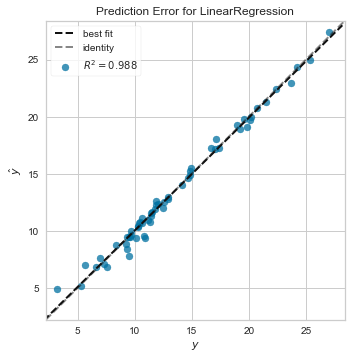

In [112]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

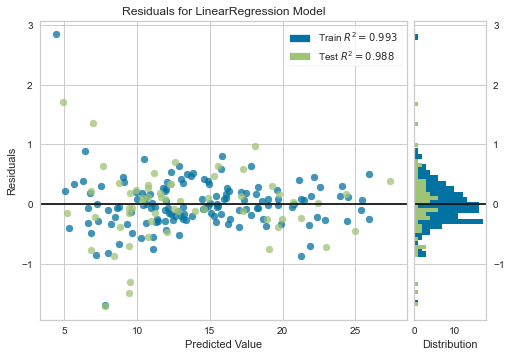

In [113]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualiser = ResidualsPlot(model)

visualiser.fit(X_train, y_train)  # Fit the training data to the visualizer
visualiser.score(X_test, y_test) # Evaluate the model on the test data
visualiser.show(); # Finalize and render the figure

## Saving Model and Conventer

In [114]:
from joblib import dump, load

In [115]:
dump(final_model, "poly_model")

['poly_model']

In [121]:
dump(final_poly_conventer, "poly_converter")

['poly_converter']

## Predictions

In [122]:
loaded_poly = load('poly_converter')

In [123]:
loaded_model = load('poly_model')

In [126]:
new_record = np.array([[149, 122, 12]])

In [128]:
new_record_poly = loaded_poly.fit_transform(new_record)
new_record_poly

array([[1.490000e+02, 1.220000e+02, 1.200000e+01, 2.220100e+04,
        1.817800e+04, 1.788000e+03, 1.488400e+04, 1.464000e+03,
        1.440000e+02, 3.307949e+06, 2.708522e+06, 2.664120e+05,
        2.217716e+06, 2.181360e+05, 2.145600e+04, 1.815848e+06,
        1.786080e+05, 1.756800e+04, 1.728000e+03]])

In [129]:
loaded_model.predict(new_record_poly)

array([38.20824906])